In [3]:
# Load modules
from __future__ import print_function
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa
import statsmodels.api as sm
import os




In [4]:

# Change working Directory
os.chdir('/home/ishta/Analyzing-and-predicting-the-volatile-market-patterns-for-trading/Notebooks_time_series')


In [5]:

# Load Dataset
data = pd.read_csv('Datasets/eurusd_minute.csv')
data.head()


,Date,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
0,2005-01-02,18:29,1.3555,1.3555,1.3555,1.3555,0.0,1.3565,1.3565,1.3565,1.3565,0.0
1,2005-01-02,18:38,1.3555,1.3555,1.3555,1.3555,0.0,1.3565,1.3565,1.3565,1.3565,0.0
2,2005-01-02,18:51,1.3562,1.3562,1.3562,1.3562,0.0,1.3572,1.3572,1.3572,1.3572,0.0
3,2005-01-02,18:52,1.3560,1.3560,1.3560,1.3560,0.0,1.3570,1.3570,1.3570,1.3570,0.0
4,2005-01-02,18:55,1.3563,1.3563,1.3563,1.3563,0.0,1.3573,1.3573,1.3573,1.3573,0.0


In [6]:
# Assuming 'Date' and 'Time' columns are in datetime format
if 'Date' in data.columns and 'Time' in data.columns:
    data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
    data.set_index('DateTime', inplace=True)

# Define the time range
start_time = '2005-01-17 00:00:00'
end_time = '2005-01-21 00:00:00'

# Extract rows within the specified time range
selected_rows = data.loc[start_time:end_time].copy()  # Ensure you have a copy

# Drop rows with empty points (NaN values)
selected_rows.dropna(inplace=True)

# Reset the index if needed
selected_rows.reset_index(inplace=True)

#Change the row indices of the dataframe using the Date column
selected_rows.index = selected_rows['DateTime']

<Axes: xlabel='DateTime'>

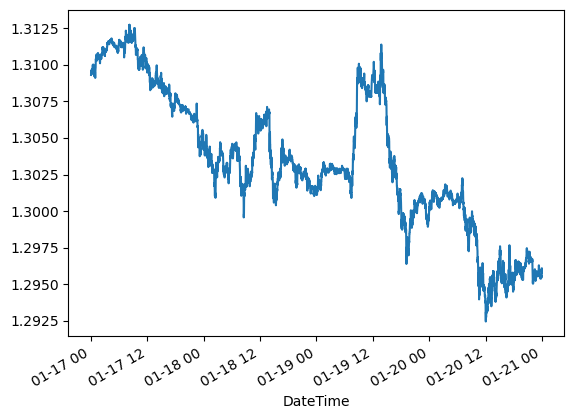

In [10]:
#Rename the second column
selected_rows.BC.plot()

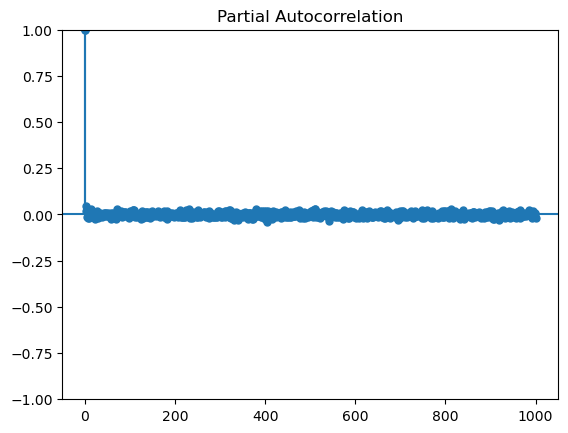

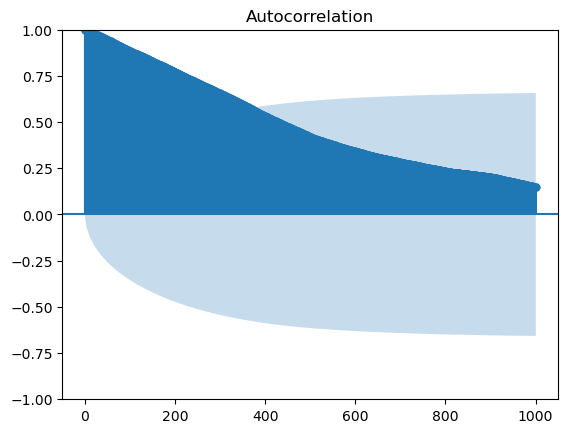

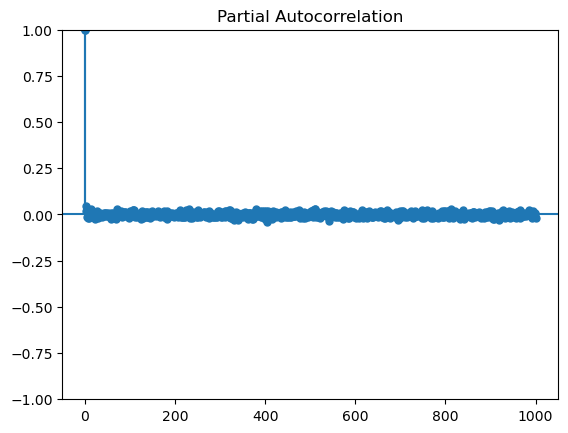

In [15]:
# Plot ACF and PACF
selected_rows=selected_rows.dropna()
plot_acf(selected_rows.BC, lags=1000)
plot_pacf(selected_rows.BC, lags=1000)

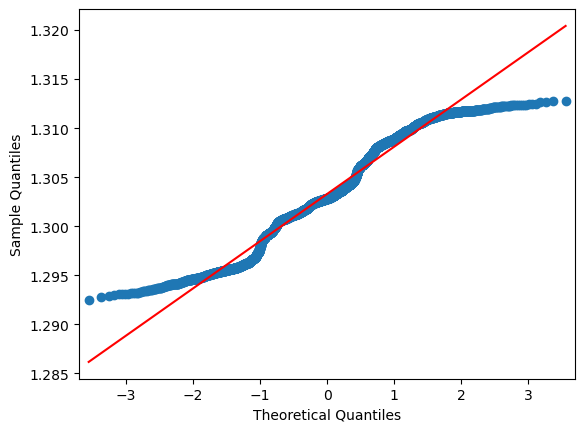

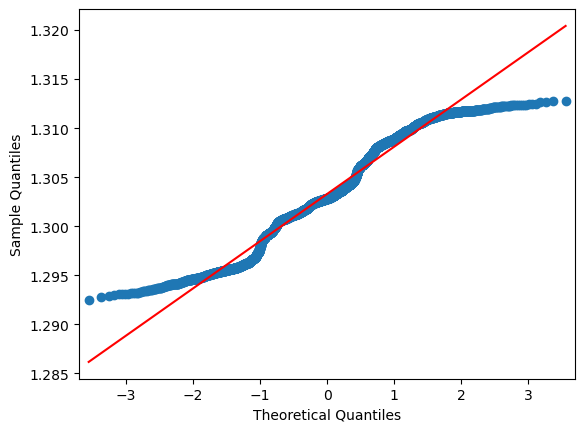

In [17]:
# QQ plot and probability plot
sm.qqplot(selected_rows['BC'], line='s')

In [20]:
from scipy.stats import probplot

In [39]:

# Assuming ibm_df is your DataFrame containing 'Close_Price'

# Optimize ARMA parameters
aicVal = []
for ari in range(1, 3):
    for maj in range(0, 3):
        arma_obj = sm.tsa.ARIMA(selected_rows.BC.tolist(), order=(ari, 0, maj)).fit(method='mle', trend='nc')
        aicVal.append([ari, maj, arma_obj.aic])

# Find parameters with minimum AIC
min_aic_params = min(aicVal, key=lambda x: x[2])
optimal_order = (min_aic_params[0], 0, min_aic_params[1])

# Fit final ARMA model with optimal parameters
arma_obj_fin = sm.tsa.ARIMA(ibm_df.Close_Price.tolist(), order=optimal_order, trend='nc').fit(method='mle')
ibm_df['ARMA'] = arma_obj_fin.predict()

# Display summary of the final model
print(arma_obj_fin.summary())


TypeError: ARIMA.fit() got an unexpected keyword argument 'trend'

KeyError: 'ARMA'

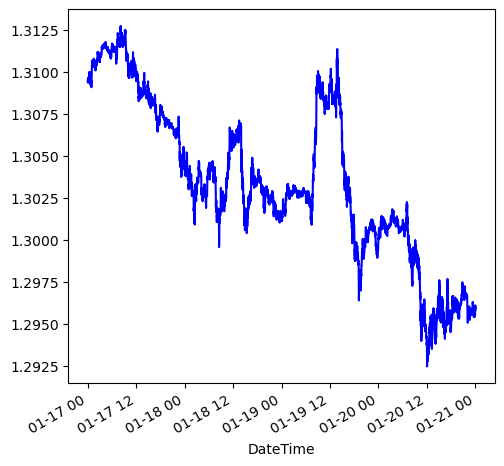

In [37]:

# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
selected_rows['BC'].iloc[1:].plot(color='b', linestyle = '-', ax=axarr)
selected_rows['ARMA'].iloc[1:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARMA(1,0)')
plt.xlabel('Index')
plt.ylabel('Closing price')